# 多元线性回归 II

黄荣贵（复旦大学社会学系）


In [1]:
library(car)

summary(Prestige)

Loading required package: carData


   education          income          women           prestige    
 Min.   : 6.380   Min.   :  611   Min.   : 0.000   Min.   :14.80  
 1st Qu.: 8.445   1st Qu.: 4106   1st Qu.: 3.592   1st Qu.:35.23  
 Median :10.540   Median : 5930   Median :13.600   Median :43.60  
 Mean   :10.738   Mean   : 6798   Mean   :28.979   Mean   :46.83  
 3rd Qu.:12.648   3rd Qu.: 8187   3rd Qu.:52.203   3rd Qu.:59.27  
 Max.   :15.970   Max.   :25879   Max.   :97.510   Max.   :87.20  
     census       type   
 Min.   :1113   bc  :44  
 1st Qu.:3120   prof:31  
 Median :5135   wc  :23  
 Mean   :5402   NA's: 4  
 3rd Qu.:8312            
 Max.   :9517            

In [2]:
levels(Prestige$type)

[1] "bc"   "prof" "wc"

### 虚拟变量

In [3]:
mod <- lm(prestige ~ income + education + type, data=Prestige)

summary(mod)


Call:
lm(formula = prestige ~ income + education + type, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9529  -4.4486   0.1678   5.0566  18.6320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.6229292  5.2275255  -0.119    0.905    
income       0.0010132  0.0002209   4.586 1.40e-05 ***
education    3.6731661  0.6405016   5.735 1.21e-07 ***
typeprof     6.0389707  3.8668551   1.562    0.122    
typewc      -2.7372307  2.5139324  -1.089    0.279    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.095 on 93 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8349,	Adjusted R-squared:  0.8278 
F-statistic: 117.5 on 4 and 93 DF,  p-value: < 2.2e-16


统计检验

In [4]:
Anova(mod)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
income,1058.7703,1,21.033931,1.404920e-05
education,1655.4725,1,32.888242,1.205177e-07
type,591.1628,2,5.872131,3.966438e-03
Residuals,4681.2762,93,NA,NA


调整虚拟变量的参照组

In [5]:
Prestige$type2 = relevel(Prestige$type, "prof")

levels(Prestige$type2)

[1] "prof" "bc"   "wc"

In [6]:
mod2 <- lm(prestige ~ income + education + type2, data=Prestige)

summary(mod2)


Call:
lm(formula = prestige ~ income + education + type2, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.9529  -4.4486   0.1678   5.0566  18.6320 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.4160415  8.6921560   0.623  0.53475    
income       0.0010132  0.0002209   4.586 1.40e-05 ***
education    3.6731661  0.6405016   5.735 1.21e-07 ***
type2bc     -6.0389707  3.8668551  -1.562  0.12175    
type2wc     -8.7762014  2.7709706  -3.167  0.00208 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.095 on 93 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8349,	Adjusted R-squared:  0.8278 
F-statistic: 117.5 on 4 and 93 DF,  p-value: < 2.2e-16


统计检验结果不变

In [7]:
Anova(mod2)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
income,1058.7703,1,21.033931,1.404920e-05
education,1655.4725,1,32.888242,1.205177e-07
type2,591.1628,2,5.872131,3.966438e-03
Residuals,4681.2762,93,NA,NA


### 交互项

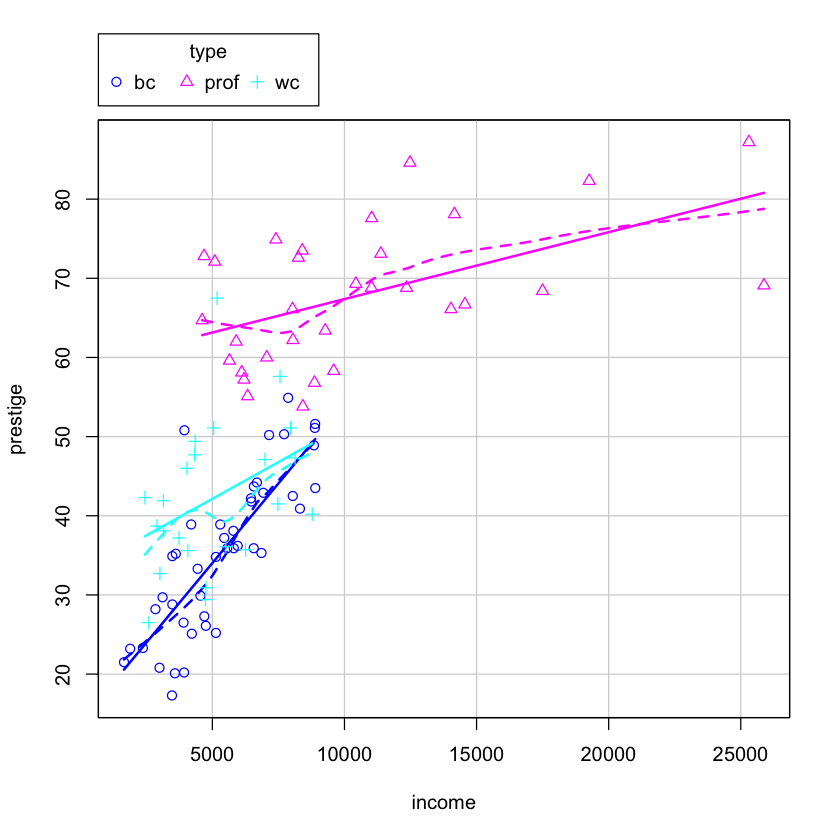

In [8]:
scatterplot(prestige ~ income | type, data=Prestige)

In [9]:
mod3 <- lm(prestige ~ education + income*type, data=Prestige)

summary(mod3)


Call:
lm(formula = prestige ~ education + income * type, data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8720  -4.8321   0.8534   4.1425  19.6710 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.7272633  4.9515480  -1.359   0.1776    
education        3.0396961  0.6003699   5.063 2.14e-06 ***
income           0.0031344  0.0005215   6.010 3.79e-08 ***
typeprof        25.1723873  5.4669586   4.604 1.34e-05 ***
typewc           7.1375093  5.2898177   1.349   0.1806    
income:typeprof -0.0025102  0.0005530  -4.539 1.72e-05 ***
income:typewc   -0.0014856  0.0008720  -1.704   0.0919 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.455 on 91 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.8663,	Adjusted R-squared:  0.8574 
F-statistic: 98.23 on 6 and 91 DF,  p-value: < 2.2e-16


Type-II检验

In [10]:
Anova(mod3)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
education,1067.9831,1,25.634360,2.141642e-06
income,1058.7703,1,25.413230,2.342033e-06
type,591.1628,2,7.094719,1.369781e-03
income:type,890.0186,2,10.681376,6.808721e-05
Residuals,3791.2575,91,NA,NA


关于不同类型方差分析，详见：

[Anova – Type I/II/III SS explained](https://mcfromnz.wordpress.com/2011/03/02/anova-type-iiiiii-ss-explained/)

[Anova – Type I/II/III SS explained](http://md.psych.bio.uni-goettingen.de/mv/unit/lm_cat/lm_cat_unbal_ss_explained.html#type-ii-and-iii-ss-using-the-car-package)

例析：检验income:type交互项

In [11]:
lht(mod3, rbind(c(0, 0, 0, 0, 0, 1, 0),
                c(0, 0, 0, 0, 0, 0, 1))
   )

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
93,4681.276,NA,NA,NA,NA
91,3791.258,2,890.0186,10.68138,6.808721e-05


例析：Type II 检验type项

* 计算Sum of Sq

In [12]:
mod4 <- lm(prestige ~ education + income + type, data=Prestige)

mod5 <- lm(prestige ~ education + income, data=Prestige)

anova(mod5, mod4)

ERROR: Error in anova.lmlist(object, ...): models were not all fitted to the same size of dataset


In [14]:
Prestige = na.exclude(Prestige)

mod4 <- lm(prestige ~ education + income + type, data=Prestige)
mod5 <- lm(prestige ~ education + income, data=Prestige)

In [15]:
anova(mod5, mod4)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
95,5272.439,NA,NA,NA,NA
93,4681.276,2,591.1628,5.872131,0.003966438


* 计算F值

In [16]:
(591.1628/2) / (3791.2575/91)

[1] 7.094719

### 交互效应可视化

In [17]:
library(effects)

eff <- allEffects(mod3)

names(eff)

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 
lattice theme set by effectsTheme()
See ?effectsTheme for details.


[1] "education"   "income:type"

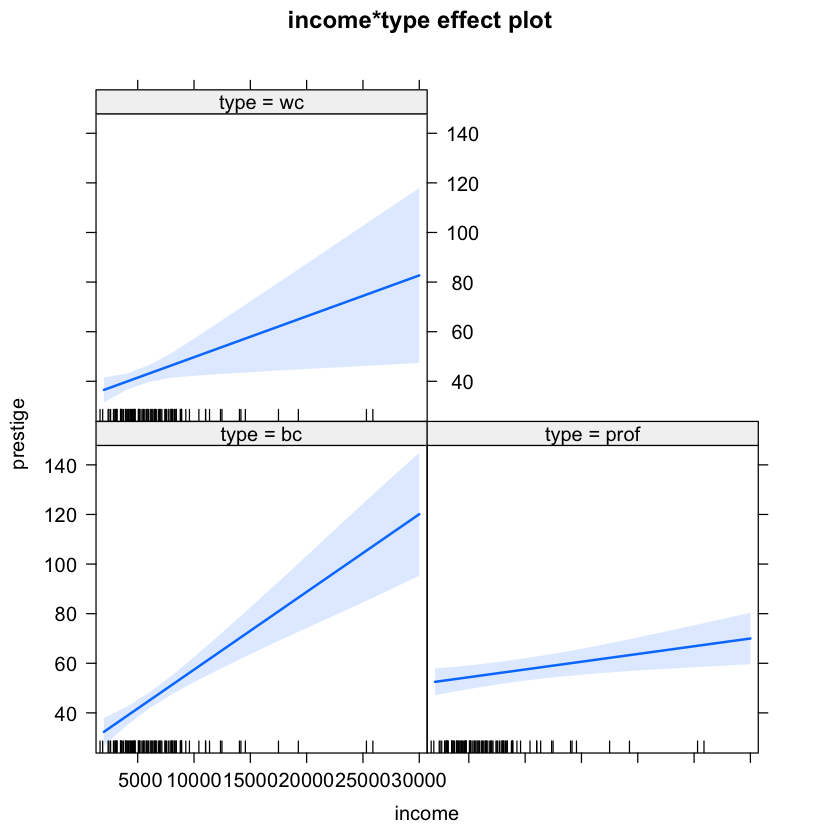

In [18]:
plot(eff["income:type"])

### 对系数及其置信区间可视化

Loading required package: ggplot2


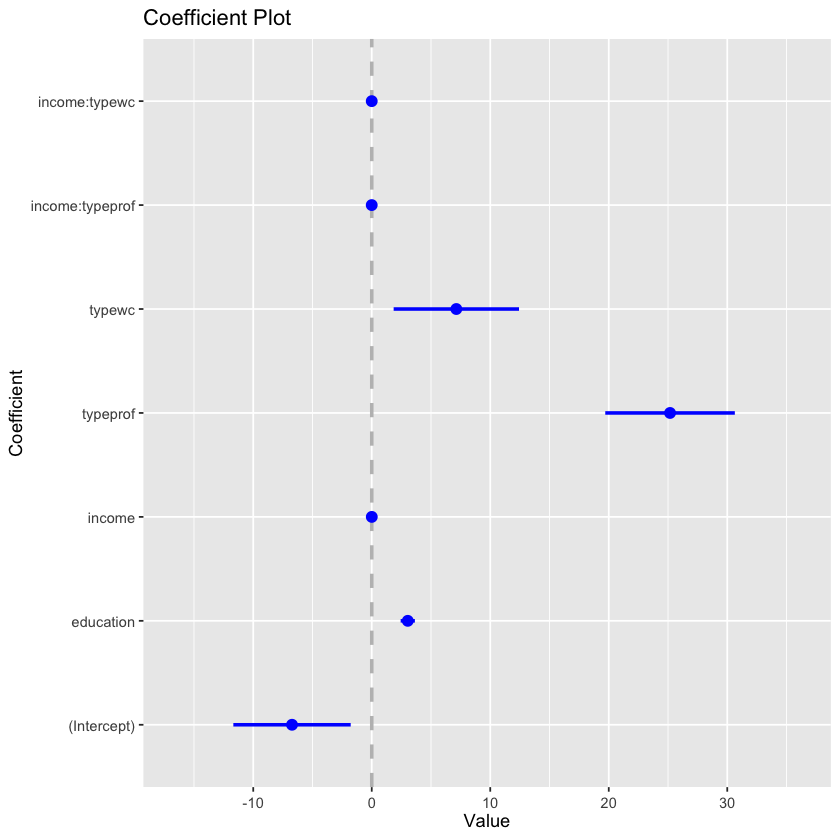

In [19]:
library(coefplot)

coefplot(mod3)

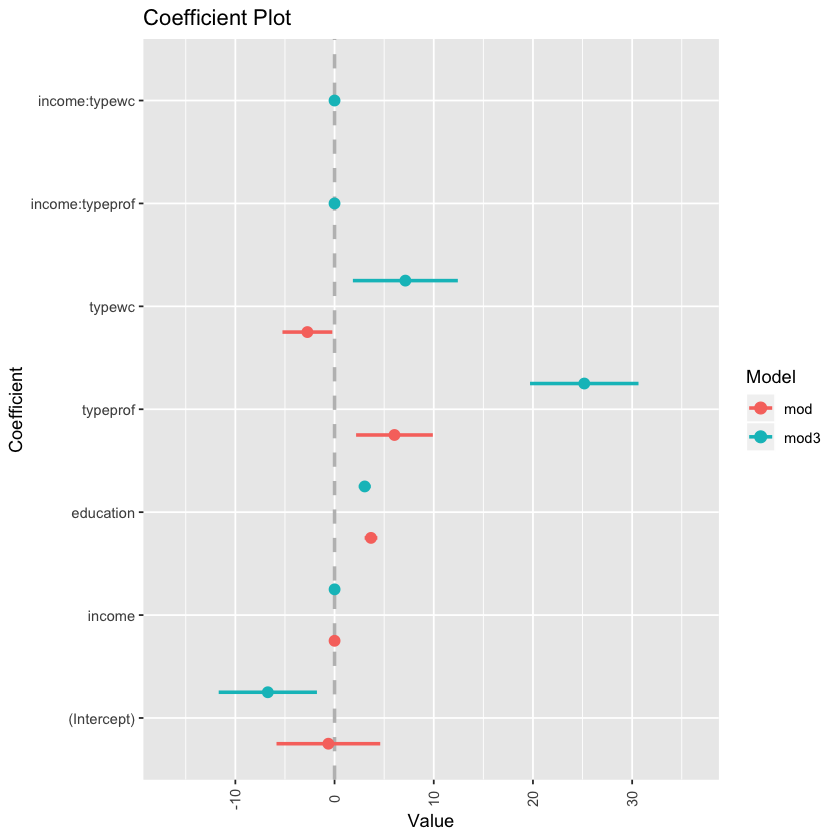

In [20]:
multiplot(mod, mod3)

### 汇报回归结果

* 使用car模块中的compareCoefs函数

In [21]:
compareCoefs(mod, mod3)

Calls:
1: lm(formula = prestige ~ income + education + type, data = Prestige)
2: lm(formula = prestige ~ education + income * type, data = Prestige)

                 Model 1   Model 2
(Intercept)       -0.623    -6.727
SE                 5.228     4.952
                                  
income          0.001013  0.003134
SE              0.000221  0.000522
                                  
education          3.673     3.040
SE                 0.641     0.600
                                  
typeprof            6.04     25.17
SE                  3.87      5.47
                                  
typewc             -2.74      7.14
SE                  2.51      5.29
                                  
income:typeprof          -0.002510
SE                        0.000553
                                  
income:typewc            -0.001486
SE                        0.000872
                                  


* 使用memisc模块的mtable命令

In [22]:
library(memisc)

mtable(mod, mod3)

Loading required package: lattice
Loading required package: MASS

Attaching package: ‘memisc’

The following object is masked from ‘package:ggplot2’:

    syms

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    contr.sum, contr.treatment, contrasts

The following object is masked from ‘package:base’:

    as.array

Warning message in checkLaTeXcape(leaders, "row leaders"):
“Unescaped TeX special in row leaders”

Calls:
mod: lm(formula = prestige ~ income + education + type, data = Prestige)
mod3: lm(formula = prestige ~ education + income * type, data = Prestige)

================================================
                             mod       mod3     
------------------------------------------------
  (Intercept)             -0.623     -6.727     
                          (5.228)    (4.952)    
  income                   0.001***   0.003***  
                          (0.000)    (0.001)    
  education                3.673***   3.040***  
                          (0.641)    (0.600)    
  type: prof/bc            6.039     25.172***  
                          (3.867)    (5.467)    
  type: wc/bc             -2.737      7.138     
                          (2.514)    (5.290)    
  income x type: prof/bc             -0.003***  
                                     (0.001)    
  income x type: wc/bc               -0.001     
                                     (0.001)    
------------------------------------------------
  R-squared                0.835      0.866     
  N                       98         98         
================================================
  Significance: *** = p < 0.001;   
                ** = p < 0.01; * = p < 0.05

* 使用apaTables模块的apa.reg.table命令 （APA格式）

In [23]:
library(apaTables)

apa.reg.table(mod, mod3, filename="apaTable.doc")



Regression results using prestige as the criterion
 

       Predictor       b       b_95%_CI sr2  sr2_95%_CI             Fit
     (Intercept)   -0.62 [-11.00, 9.76]                                
          income  0.00**   [0.00, 0.00] .04  [.00, .07]                
       education  3.67**   [2.40, 4.95] .06  [.02, .10]                
        typeprof    6.04 [-1.64, 13.72] .00 [-.01, .02]                
          typewc   -2.74  [-7.73, 2.25] .00 [-.01, .01]                
                                                            R2 = .835**
                                                        95% CI[.77,.87]
                                                                       
     (Intercept)   -6.73 [-16.56, 3.11]                                
       education  3.04**   [1.85, 4.23] .04  [.01, .07]                
          income  0.00**   [0.00, 0.00] .05  [.02, .09]                
        typeprof 25.17** [14.31, 36.03] .03  [.00, .06]                
        

通过如下命令可以直接打开doc文档

In [24]:
browseURL("apaTable.doc")

### 预测

In [25]:
predict(mod3)

gov.administrators          general.managers               accountants 
                 66.00548                  71.86641                  63.04934 
      purchasing.officers                  chemists                physicists 
                 58.69231                  68.13094                  72.87130 
               biologists                architects           civil.engineers 
                 69.46908                  74.21909                  69.68345 
         mining.engineers                 surveyors               draughtsmen 
                 69.82723                  59.79120                  60.23987 
      computer.programers                economists             psychologists 
                 65.74331                  67.36282                  66.71763 
           social.workers                   lawyers                librarians 
                 65.59437                  78.40580                  65.27216 
   vocational.counsellors                 ministers       university.teachers 
                 70.69760                  65.44589                  74.77954 
  primary.school.teachers secondary.school.teachers                physicians 
                 63.37147                  69.29886                  82.75685 
            veterinarians  osteopaths.chiropractors                    nurses 
                 75.98551                  74.08194                  59.19996 
            nursing.aides          physio.therapsts               pharmacists 
                 32.92129                  63.02440                  71.19094 
      medical.technicians        commercial.artists       radio.tv.announcers 
                 47.82900                  56.02375                  51.51339 
              secretaries                   typists               bookkeepers 
                 42.29508                  40.52694                  41.98881 
         tellers.cashiers        computer.operators           shipping.clerks 
                 36.78900                  42.08072                  36.13444 
              file.clerks              receptionsts             mail.carriers 
                 42.13311                  38.75181                  37.52306 
            postal.clerks       telephone.operators                collectors 
                 37.18504                  37.56947                  42.27204 
          claim.adjustors             travel.clerks             office.clerks 
                 42.57206                  45.47413                  40.56597 
        sales.supervisors     commercial.travellers              sales.clerks 
                 42.65756                  48.71897                  35.23631 
service.station.attendant          insurance.agents      real.estate.salesmen 
                 30.88547                  49.07752                  45.64924 
                   buyers              firefighters                 policemen 
                 47.05635                  49.93924                  54.36466 
                    cooks                bartenders         funeral.directors 
                 26.56681                  31.42839                  50.06700 
               launderers                  janitors        elevator.operators 
                 24.95694                  25.76765                  27.54109 
             farm.workers      rotary.well.drillers                    bakers 
                 24.60471                  41.76729                  29.35343 
           slaughterers.1            slaughterers.2                   canners 
                 32.58808                  32.58808                  21.75132 
          textile.weavers         textile.labourers           tool.die.makers 
                 27.53449                  24.68371                  49.15333 
               machinists       sheet.metal.workers                   welders 
                 41.00913                  39.38359                  37.64871 
             auto.workers          aircraft.workers      

In [26]:
predict(mod3, interval="confidence")

,fit,lwr,upr
gov.administrators,66.00548,63.24223,68.76874
general.managers,71.86641,64.03647,79.69636
accountants,63.04934,60.26891,65.82977
purchasing.officers,58.69231,54.81666,62.56795
chemists,68.13094,65.51341,70.74847
physicists,72.87130,69.93245,75.81015
biologists,69.46908,66.59734,72.34083
architects,74.21909,71.14922,77.28897
civil.engineers,69.68345,67.31094,72.05596
mining.engineers,69.82723,67.43339,72.22108


In [27]:
predict(mod3, interval="prediction")

Warning message in predict.lm(mod3, interval = "prediction"):
“predictions on current data refer to _future_ responses
”

,fit,lwr,upr
gov.administrators,66.00548,52.88978,79.12119
general.managers,71.86641,56.84329,86.88954
accountants,63.04934,49.93000,76.16867
purchasing.officers,58.69231,45.29803,72.08659
chemists,68.13094,55.04516,81.21672
physicists,72.87130,59.71748,86.02512
biologists,69.46908,56.33009,82.60808
architects,74.21909,61.03538,87.40281
civil.engineers,69.68345,56.64447,82.72243
mining.engineers,69.82723,56.78435,82.87011


### 残差

In [28]:
resid(mod3)

gov.administrators          general.managers               accountants 
               2.79451534               -2.76641426                0.35066041 
      purchasing.officers                  chemists                physicists 
              -1.89230986                5.36905992                4.72870064 
               biologists                architects           civil.engineers 
               3.13091705                3.88090693                3.41655020 
         mining.engineers                 surveyors               draughtsmen 
              -1.02723361                2.20879767               -0.23987131 
      computer.programers                economists             psychologists 
             -11.94331337               -5.16281507                8.18236892 
           social.workers                   lawyers                librarians 
             -10.49436785                3.89420110               -7.17215711 
   vocational.counsellors                 ministers       university.teachers 
             -12.39759916                7.35411050                9.82045802 
  primary.school.teachers secondary.school.teachers                physicians 
              -3.77147245               -3.19885701                4.44314925 
            veterinarians  osteopaths.chiropractors                    nurses 
              -9.28551453               -5.68194363                5.50003554 
            nursing.aides          physio.therapsts               pharmacists 
               1.97871480                9.07560304               -1.89093662 
      medical.technicians        commercial.artists       radio.tv.announcers 
              19.67099504                1.17625282                6.08660864 
              secretaries                   typists               bookkeepers 
               3.70491541                1.37306434                7.41119198 
         tellers.cashiers        computer.operators           shipping.clerks 
               5.51100142                5.61928344               -5.23443673 
              file.clerks              receptionsts             mail.carriers 
              -9.43310504               -0.05180633               -1.42305947 
            postal.clerks       telephone.operators                collectors 
               0.01496209                0.53053145              -12.87204277 
          claim.adjustors             travel.clerks             office.clerks 
               8.52794342               -9.77412806               -4.96596907 
        sales.supervisors     commercial.travellers              sales.clerks 
              -1.15755554               -8.51897155               -8.73631007 
service.station.attendant          insurance.agents      real.estate.salesmen 
              -7.58547165               -1.77752469                1.45076113 
                   buyers              firefighters                 policemen 
               4.04365094               -6.43923973               -2.76465838 
                    cooks                bartenders         funeral.directors 
               3.13319257              -11.22838657                4.83299971 
               launderers                  janitors        elevator.operators 
              -4.15694042               -8.46764902               -7.44109133 
             farm.workers      rotary.well.drillers                    bakers 
              -3.10470678               -6.46729374                9.54656526 
           slaughterers.1            slaughterers.2                   canners 
              -7.38807813                2.21192187                1.44868255 
          textile.weavers         textile.labourers           tool.die.makers 
               5.76551078                4.11629120               -6.65333359 
               machinists       sheet.metal.workers                   welders 
               3.19087240               -3.48358853                4.15129371 
             auto.workers          aircraft.workers      

## 模型设定检验： Ramsey’s RESET

In [29]:
library(lmtest)


resettest(prestige ~ income + education + type, data=Prestige)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




	RESET test

data:  prestige ~ income + education + type
RESET = 3.3989, df1 = 2, df2 = 91, p-value = 0.03771


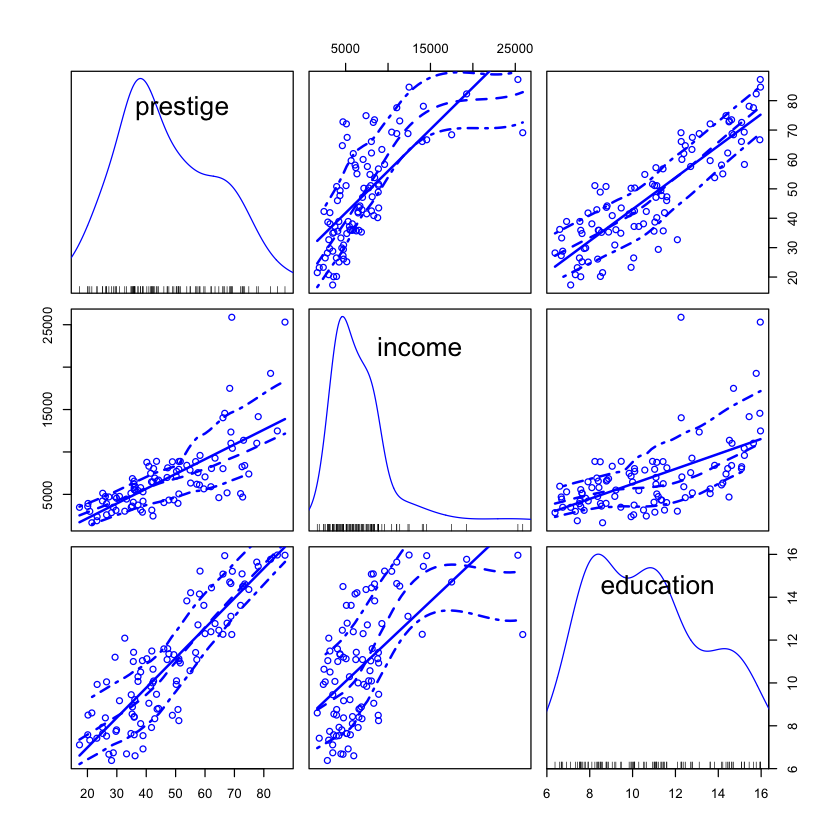

In [30]:
scatterplotMatrix(~prestige + income + education, data=Prestige)

In [31]:
summary(lm(prestige ~ income + education + I(income^2) + type, data=Prestige))


Call:
lm(formula = prestige ~ income + education + I(income^2) + type, 
    data = Prestige)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.6515  -4.4852   0.3803   4.6601  19.1576 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.148e+00  5.108e+00  -0.616  0.53930    
income       2.648e-03  6.049e-04   4.377 3.17e-05 ***
education    3.175e+00  6.404e-01   4.957 3.25e-06 ***
I(income^2) -6.376e-08  2.209e-08  -2.886  0.00485 ** 
typeprof     7.249e+00  3.746e+00   1.935  0.05606 .  
typewc      -1.118e+00  2.485e+00  -0.450  0.65389    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.831 on 92 degrees of freedom
Multiple R-squared:  0.8486,	Adjusted R-squared:  0.8403 
F-statistic: 103.1 on 5 and 92 DF,  p-value: < 2.2e-16


In [32]:
resettest(prestige ~ income + education + I(income^2) + type, data=Prestige)


	RESET test

data:  prestige ~ income + education + I(income^2) + type
RESET = 2.5303, df1 = 2, df2 = 90, p-value = 0.08529


In [33]:
resettest(prestige ~ income + education + type + income:type, data=Prestige)


	RESET test

data:  prestige ~ income + education + type + income:type
RESET = 0.18284, df1 = 2, df2 = 89, p-value = 0.8332
